<a href="https://colab.research.google.com/github/manoranjan-parida/Capstone/blob/main/RandomForest_ServiceDays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [9]:
import re
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

#Check if there is special character in columns and fill with na   
def checkSpecialChar_fillna(df):
    """
    Parameters
    ----------
    df : DataFrame
        Dataframe to check if there are any columns having specical.

    Returns
    -------
    None.

    """
    for i in df.columns:
        df[i][df[i].apply(lambda i: True if re.search('^\s*$', str(i)) else False)]=None
        #Replace NA with 0
        df[i].fillna('0',inplace=True)
        return None
    
#Replace Na with No Info
def replaceNa(df):
    """
    Parameters
    ----------
    df : DataFrame
        DataFrame to check if columns have any na or null values.

    Returns
    -------
    column_holder : dict
        column names whose values have been updated from na or null to No Info.

    """
    column_holder={}
    for i in df.columns:
        if df[i].isnull().values.any()==True:
            df[i].fillna('No Info',inplace=True)
            column_holder[i]="Updated with No Info"
    return column_holder

#Function for Gettimg Mapping of values in LabelEncoder
def get_integer_mapping(le):
    """
    Parameters
    ----------
    le : TYPE
        a fitted SKlearn LabelEncoder.

    Returns
    -------
    res : TYPE
        Return a dict mapping labels to their integer values.

    """
    res = {}
    for cl in le.classes_:
        res.update({cl:le.transform([cl])[0]})

    return res



#Fitting & Transform Label Encoder
def labelEncoder_Mapper(cat_df):
    """
    Parameters
    ----------
    cat_df : DataFrame
        Categorical DataFrame whose encoding and corresponding Mapping is needed.

    Returns
    -------
    encoder_mapping : Dict
        Dictonary of encoder mapping.

    """
    print("------>Label Encoding and Mapping has begun pls wait<------")
    le=LabelEncoder()
    encoder_mapping = {}
    for i in cat_df.columns:
        
        cat_df[i]=le.fit_transform(cat_df[i])
        print(i,'Fit Done..Mapping Started')
        encoder_mapping[i+'_Mapping'] = get_integer_mapping(le)
    
    return encoder_mapping

def getMonth(df,column):
    """
    Parameters
    ----------
    df : DataFrame
        DataFrame having column for extracting month.
    column : datetime
        date column for extracting month.

    Returns
    -------
    df : DataFrame
        DatFrame having month as column against index.

    """
    month_={}
    for i in range(0,len(df)):
        month_[i]=df[column][i].month
    df=pd.DataFrame.from_dict(month_,orient='index')
    return df
    

def getHour(df,column):
    """
    Parameters
    ----------
    df : DataFrame
        Datraframe having timestamp column for extracting hour.
    column : timestamp
        Timestamp column for extracting hour.

    Returns
    -------
    df : DataFrame
        DatFrame having hour as column against index.

    """
    hour_={}
    for i in range(0,len(df)):
        hour_[i]=df[column][i].hour
    df=pd.DataFrame.from_dict(hour_,orient='index')
    return df    

def dataTypeCheck(df,column):
    index_list_not_str=[]
    for i in range(0,len(df)):
        if type(df[column][i])==float:
            index_list_not_str.append(i)
        
    return index_list_not_str


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score,recall_score,f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [6]:
data_model_cust=pd.read_csv('/content/drive/MyDrive/Capstone/Data/data_model_cust.csv')

In [12]:
data_model_cust.columns

Index(['Unnamed: 0', 'JobCard_month', 'KMsReading', 'JobCard_day', 'OrderType',
       'PlantName1', 'Make', 'Model', 'Service_Class'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


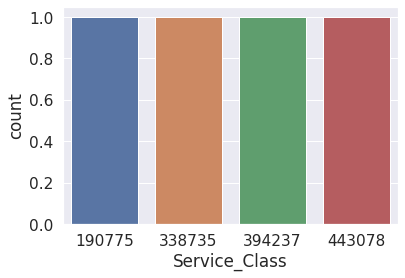

In [27]:
sns.countplot(data_model_cust.Service_Class.value_counts())

In [7]:
data_model_cust.drop(columns=['Unnamed: 0'],inplace=True)

In [8]:
#Splitting Data
y=data_model_cust['Service_Class']
X=data_model_cust.drop('Service_Class',axis=1)

In [9]:
#Train Test Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=9)

In [20]:
X_train.head(2)

,JobCard_month,KMsReading,JobCard_day,OrderType,PlantName1,Make,Model
10051,6,900354,8,2,0,12,181
1169812,5,132287,22,2,126,6,203


In [10]:
#{'n_estimators': 150, 'min_samples_leaf': 2, 'max_depth': 30, 'criterion': 'entropy'}
#Trying RF Classifier
rf=RandomForestClassifier(n_estimators=150,min_samples_leaf=2,max_depth=30,criterion='entropy')
rf.fit(X_train, y_train)
pickle.dump(rf, open(filename, 'wb'))
y_pred=rf.predict(X_test)

In [2]:
import pickle

In [17]:
import pickle
filename = "/content/drive/MyDrive/Capstone/rf_cust_model.sav"

In [ ]:
print("Accuracy Score is :",accuracy_score(y_test, y_pred))
print("Confusion Matris is :\n",confusion_matrix(y_test, y_pred))

Accuracy Score is : 0.9710899347026869
Confusion Matris is :
 [[66419    86   723   329]
 [  189 36134  1333   396]
 [  648   678 85977  1447]
 [  413   192  1469 76932]]


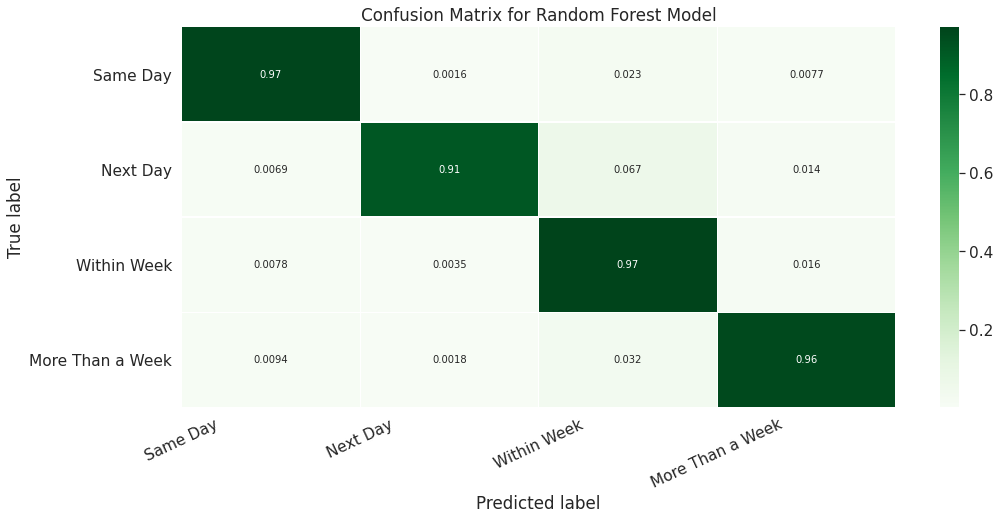

In [11]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Same Day', 'Next Day', 'Within Week', 
               'More Than a Week']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train, y_train)
acc_rf=rf.score(X_test,y_test)
print("Score",acc_rf)


In [ ]:
rf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>

In [18]:
pickle.dump(rf, open(filename, 'wb'))

In [13]:
classification_report(y_test,y_pred,digits=3)



'              precision    recall  f1-score   support\n\n           0      0.975     0.967     0.971     67557\n           1      0.984     0.913     0.947     38052\n           2      0.928     0.973     0.950     88750\n           3      0.969     0.957     0.963     79006\n\n    accuracy                          0.958    273365\n   macro avg      0.964     0.952     0.958    273365\nweighted avg      0.959     0.958     0.958    273365\n'

In [15]:
from pathlib import Path

Path("/content/rf_cust_model.sav").rename("/content/drive/MyDrive/Capstone/rf_cust_model.sav")

OSError: ignored

In [16]:
rf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>

In [ ]:

clf = GaussianNB()
clf.fit(X_train,y_train)


'              precision    recall  f1-score   support\n\n           0      0.982     0.983     0.982     67557\n           1      0.974     0.950     0.962     38052\n           2      0.961     0.969     0.965     88750\n           3      0.973     0.974     0.973     79006\n\n    accuracy                          0.971    273365\n   macro avg      0.972     0.969     0.970    273365\nweighted avg      0.971     0.971     0.971    273365\n'

In [ ]:
y_pred=clf.predict(X_test)
classification_report(y_test,y_pred,digits=3)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0      0.316     0.023     0.044     67557\n           1      0.000     0.000     0.000     38052\n           2      0.329     0.957     0.490     88750\n           3      0.300     0.040     0.071     79006\n\n    accuracy                          0.328    273365\n   macro avg      0.236     0.255     0.151    273365\nweighted avg      0.272     0.328     0.190    273365\n'

In [ ]:

dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0)
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
classification_report(y_test,y_pred,digits=3)

'              precision    recall  f1-score   support\n\n           0      0.973     0.983     0.978     67557\n           1      0.940     0.954     0.947     38052\n           2      0.970     0.943     0.956     88750\n           3      0.961     0.975     0.968     79006\n\n    accuracy                          0.964    273365\n   macro avg      0.961     0.964     0.962    273365\nweighted avg      0.964     0.964     0.964    273365\n'

In [ ]:

GBC=GradientBoostingClassifier(max_depth = 3, min_samples_split = 2)

grid_param={'learning_rate': [0.1,0.5]}

GBC_modal_selection=GridSearchCV(estimator=GBC,param_grid=grid_param,cv=5)

GBC_modal_selection.fit(X_train,y_train)
print(GBC_modal_selection.best_params_)
perf_report={}
perf_report = pd.concat([perf_report, pd.DataFrame([{'model':'GBC_Tuned_Grid',
                                             'Accuracy': accuracy_score(y_test,y_pred), 
                                            'Precision': precision_score(y_test,y_pred),
                                            'Recall': recall_score(y_test,y_pred),
                                                    'F1':f1_score(y_test,y_pred)}])])

{'learning_rate': 0.5}


NameError: ignored

In [ ]:
y_pred=GBC_modal_selection.predict(X_test)
classification_report(y_test,y_pred,digits=3)

'              precision    recall  f1-score   support\n\n           0      0.599     0.563     0.580     67557\n           1      0.680     0.040     0.076     38052\n           2      0.503     0.744     0.600     88750\n           3      0.451     0.436     0.443     79006\n\n    accuracy                          0.512    273365\n   macro avg      0.558     0.446     0.425    273365\nweighted avg      0.536     0.512     0.477    273365\n'

In [ ]:

rf=RandomForestClassifier()
max_depth=[30]
min_samples_leaf=[2,5]
criterion=['gini', 'entropy']
n_estimators=[100,500]

grid_param={"max_depth":max_depth,
            "min_samples_leaf":min_samples_leaf,
            "criterion":criterion,
            "n_estimators":n_estimators}

rf_modal_selection=RandomizedSearchCV(estimator=rf,param_distributions=grid_param,n_iter=10,cv=5,random_state=3)
rf_modal_selection.fit(X_train,y_train)
y_pred=rf_modal_selection(X_test)
print(rf_modal_selection.best_params_)
classification_report(y_test,y_pred,digits=3)



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


# New Section